In [1]:
#importing liabraries we need in our predectif model
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report
from sklearn import metrics

In [2]:
#loading data
titanic_path=("D:/2020/go my code/checkpoint3/titanic-passengers.csv")
titanic_data=pd.read_csv(titanic_path, encoding="ISO-8859-1", sep=";")
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S


### exploring and cleaning the data 

In [3]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [55]:
titanic_data['Age'].mean()

29.69911764705882

In [4]:
titanic_data['Age'].fillna(30, inplace=True)
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,30.0,0,0,349215,7.8958,NaN,S


In [38]:
titanic_data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [57]:
titanic_data['Cabin'].value_counts()

C23 C25 C27    4
B96 B98        4
G6             4
D              3
F33            3
              ..
D47            1
A31            1
B19            1
C101           1
C62 C64        1
Name: Cabin, Length: 147, dtype: int64

In [5]:
titanic_data['Embarked'].fillna('S', inplace=True)

In [6]:
titanic_data['Embarked']=titanic_data['Embarked'].map({'S':0, 'C':1, 'Q':2})
titanic_data['Sex']=titanic_data['Sex'].map({'male':0, 'female':1})
titanic_data['Survived']=titanic_data['Survived'].map({'No':0, 'Yes':1})
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",0,28.0,0,0,248740,13.0000,NaN,0
1,76,0,3,"Moen, Mr. Sigurd Hansen",0,25.0,0,0,348123,7.6500,F G73,0
2,641,0,3,"Jensen, Mr. Hans Peder",0,20.0,0,0,350050,7.8542,NaN,0
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",1,29.0,0,4,349909,21.0750,NaN,0
4,672,0,1,"Davidson, Mr. Thornton",0,31.0,1,0,F.C. 12750,52.0000,B71,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,NaN,1
887,61,0,3,"Sirayanian, Mr. Orsen",0,22.0,0,0,2669,7.2292,NaN,1
888,535,0,3,"Cacic, Miss. Marija",1,30.0,0,0,315084,8.6625,NaN,0
889,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",0,30.0,0,0,349215,7.8958,NaN,0


In [7]:
titanic_data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [8]:
#Adding a new feature family size
titanic_data['Famsize']=titanic_data['SibSp']+titanic_data['Parch']+1

In [62]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Famsize
0,343,0,2,"Collander, Mr. Erik Gustaf",0,28.0,0,0,248740,13.0000,NaN,0,1
1,76,0,3,"Moen, Mr. Sigurd Hansen",0,25.0,0,0,348123,7.6500,F G73,0,1
2,641,0,3,"Jensen, Mr. Hans Peder",0,20.0,0,0,350050,7.8542,NaN,0,1
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",1,29.0,0,4,349909,21.0750,NaN,0,5
4,672,0,1,"Davidson, Mr. Thornton",0,31.0,1,0,F.C. 12750,52.0000,B71,0,2


# Applying logistic regression model 

In [9]:
#features extraction
x=titanic_data[['Pclass','Sex', 'Age','Fare','Embarked','Famsize']]
y=titanic_data['Survived']

In [10]:
#Splitting the dataset with test size of 30%
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.30, random_state=40)

In [11]:
#build the logistic regression model
logreg=LogisticRegression()
#fitting the training data
logreg.fit(x_train, y_train)


LogisticRegression()

In [15]:
#Testing model's performance 
y_pred=logreg.predict(x_test)
print("Accuracy={:.2f}".format(logreg.score(x_test,y_test)))

Accuracy=0.81


## Checking the model performance using confusion matrix

In [16]:
confusion_matrix=pd.crosstab(y_test,y_pred, rownames=['Actual'], colnames=['Predicted'])
print(confusion_matrix)

Predicted    0   1
Actual            
0          138  24
1           28  78


In [17]:
##Classification report
from sklearn.metrics import classification_report 
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       162
           1       0.76      0.74      0.75       106

    accuracy                           0.81       268
   macro avg       0.80      0.79      0.80       268
weighted avg       0.80      0.81      0.81       268



we notice that the model makes better predictions with not-survived passengers : precision =0.83, recall=0.84. in the 
other hand predicitions are less accurate for survived passengers : precision=0.76 , recall=0.75.

# 3/Using the ROC/AUC validiation matrix

##Explaining the ROC/AUC validation matrix for binary classification models 
We use AUC (Area Under the Curve) of "Receiver Operator Characteristics" (ROC) to evaluate the accuracy of our logisitic regression model
##What is an AUC-ROC curve?
The ROC curve is an evaluation metric for binary classification problems. It is a probability curve that plots the True Positive Rate (TPR) against the False Negative Rate(FNR) at various threshold values and essentially separates the signal from the noise.
The AUC is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC 
When AUC=1 ==> the model distinguish perfectly between all posive and negative class points
When AUC=0 ==> the classifier would predict all positive oints as negeative and all negative points as positive
When 0.5<AUC<1 the classifier is able to detect more numbers of true positives and true negatives then false positves and false negatives
When the AUC=0.5 ==> the model is not able to distinguish between positive and negative class points

In [18]:
#predict probabilities 
pred_prob=logreg.predict_proba(x_test)

In [25]:
from sklearn.metrics import roc_curve 
#Roc curve for the binary classifier 
fpr, tpr, thresh=roc_curve(y_test,pred_prob[:,1], pos_label=1)
#roc curve for fpr=tpr
random_probs=[0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)


In [26]:
#computing the model roc_score to figure out its performance
from sklearn.metrics import roc_auc_score

# auc scores
auc_score = roc_auc_score(y_test, pred_prob[:,1])
print(auc_score)


0.8670218961099464


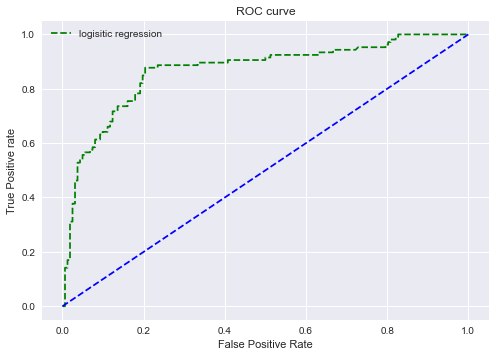

In [27]:
#plot the roc curve
plt.style.use('seaborn')
#plot roc curves 
plt.plot(fpr, tpr, linestyle='--', color='green', label='logisitic regression')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()